<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/ML_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [ ]:
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [60]:
df = pd.read_csv("/content/crimes_against_women_2001-2014.csv")# чтение файла
df.groupby("Year")
df


,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [63]:
df.Year = df.Year.astype("category")
describe = df["Year"].describe(include="all") # ваш код здесь
describe
# Y - Year
# X - Rape

count     10677
unique       14
top        2014
freq        837
Name: Year, dtype: int64

In [9]:
mean = df["Rape"].mean()# (среднее) ваш код здесь
mean

57.98988479910087

In [10]:
median = df["Rape"].median()# (медиана) ваш код здесь
median

22.0

In [11]:
mode = df["Rape"].mode()# (мода) ваш код здесь
mode

0    0
Name: Rape, dtype: int64

In [12]:
min = df["Rape"].min()# (минимум) ваш код здесь
min

0

In [ ]:
max = df["Rape"].max()# (максимум) ваш код здесь
max

5076

In [ ]:
std = df["Rape"].std()# (стандартное отклонение) Ваш код здесь
std

214.23039847185055

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [ ]:
q1 = df["Rape"].quantile(0.25)# (25% квантиль) ваш код здесь
q1

8.0

In [ ]:
q2 = df["Rape"].quantile(0.50)# (50% квантиль) ваш код здесь
q2

22.0

In [ ]:
q3 = df["Rape"].quantile(0.75)# (75% квантиль) ваш код здесь
q3

44.0

In [ ]:
iqr = q3 - q1# (интерквартильный размах) ваш код здесь
iqr

36.0

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Максимальное значение сильно отличается от квантиля 75%, следовательно, присутствует выброс.
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

<Axes: ylabel='Count'>

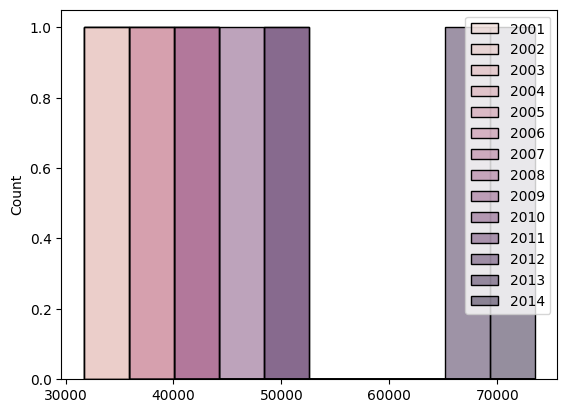

In [64]:

Years = list(set(df["Year"]))
Rape_cnt = [0 for i in range(len(Years))]



for i in range(len(df.index)-1):
  cur_year = df.iloc[i]["Year"]
  for x in Years:
    if cur_year == x:
      Rape_cnt[Years.index(x)] += df.iloc[i]["Rape"]



rapes_to_year = dict(map(lambda x, y : (x, y), Years, Rape_cnt))

sns.histplot(x=rapes_to_year.values(), hue=rapes_to_year.keys(), bins=10)



Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

<Axes: ylabel='Rape'>

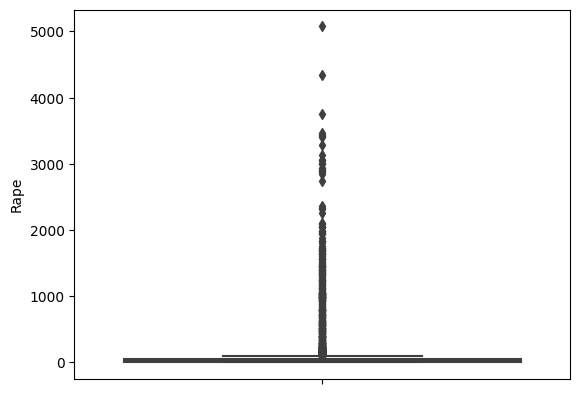

In [69]:
sns.boxplot(data=df, y="Rape")

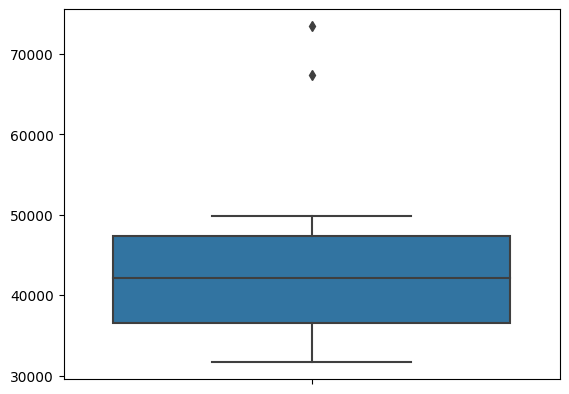

In [70]:
B = sns.boxplot(y = list(rapes_to_year.values()))

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

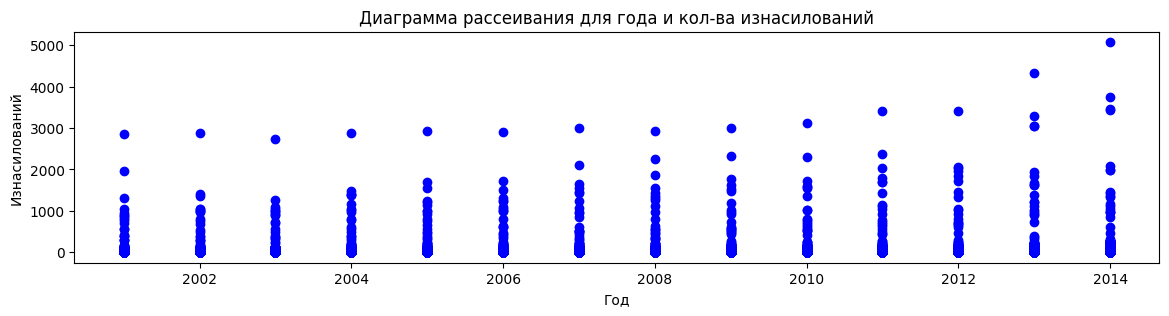

In [71]:
plt.figure(figsize=(14, 3))
plt.scatter(x=df["Year"], y=df["Rape"], color='blue')
plt.title('Диаграмма рассеивания для года и кол-ва изнасилований')
plt.xlabel('Год')
plt.ylabel('Изнасилований')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

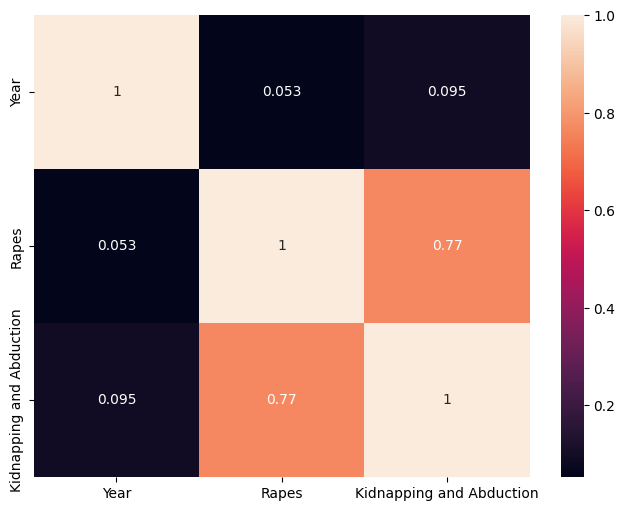

In [17]:
Years = list(set(df["Year"]))
Rapes_by_year = [0 for i in range(len(Years))]
Kidnapping_by_year = [0 for i in range(len(Years))]


for i in range(len(df.index)-1):
  cur_year = df.iloc[i]["Year"]
  for year in Years:
    if cur_year == year:
      Rapes_by_year[Years.index(year)] += df.iloc[i]["Rape"]
      Kidnapping_by_year[Years.index(year)] += df.iloc[i]["Kidnapping and Abduction"]


#rapes_to_year = dict(map(lambda x, y : (x, y), Years, Rape_by_year))
#print(rapes_to_year)

corr_matrix = pd.DataFrame({
    'Year': df["Year"],
    'Rapes': df["Rape"],
    'Kidnapping and Abduction': df["Kidnapping and Abduction"]
}).corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

Количество изнасилований и похищений женщин часто случаются вместе.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]